<a href="https://colab.research.google.com/github/NM2509/Molecules/blob/main/Markov_Chains_in_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math 
import scipy.linalg as la
import matplotlib.pyplot as plt

# I am rounding probability down to 3

Enter the number of steps: 11
Please enter coordinate in the form 3,4 for (3,4)1,1


Text(0.5, 1.0, 'Probability of being at any particular point after n steps giving intial point \n\n Blue circle indicates initial point; Red dots indicate where it can end up with positive probability')

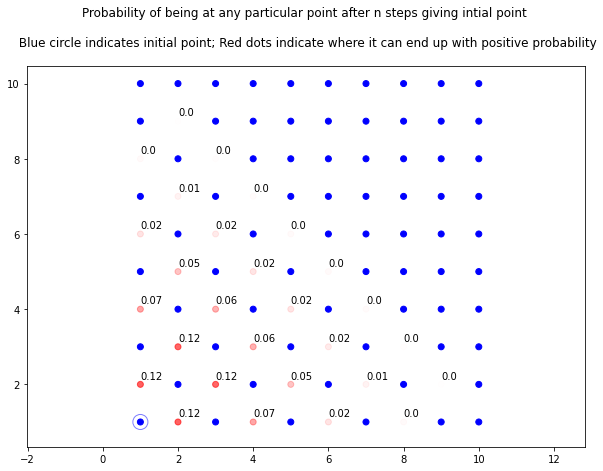

In [ ]:
# To calculate probability after 10 steps with initial point selected 
n = input("Enter the number of steps: ") # specify the number of steps
n = int(n)

lookup_value = input("Please enter coordinate in the form 3,4 for (3,4)")
lookup_value = tuple(map(int, lookup_value.split(',')))


X = np.array([1,2,3,4,5,6,7,8,9,10])
Y = np.array([1,2,3,4,5,6,7,8,9,10])
x,y = np.meshgrid(X,Y)

# Defining transition matrix 
i = []
for k in range(10):
  for m in range(10):
    i.append((x[k][m],y[k][m]))

j = []
for k in range(10):
  for m in range(10):
    j.append((x[k][m],y[k][m]))

permutations = []
for element in i:
  for el in j:
    permutations.append((element, el))
permutations

# Defining which points are on the outside, which on inside and which are corners
corner = [(1,1),(10,1),(10,10),(1,10)]

outside = []
for element in i:
  if (element[0] ==1) or (element[1]==1) or (element[0] ==10) or (element[1] ==10):
    if element not in corner:
      outside.append(element)

inside = []
for element in i:
  if element not in corner:
    if element not in outside:
      inside.append(element)

prob = []

for element in permutations:
  if element[0] in inside:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 0.25
    else:
      probability = 0 
  if element[0] in corner:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/2
    else: 
      probability = 0
  if element[0] in outside:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/3
    else: 
      probability = 0 
  prob.append(probability)
P = np.array(prob).reshape((100,100))


#Create dictionary which will help go from transition probabilities to matrix elements 
dictionary = dict({})
ls = []
for k in range(10):
  for m in range(10):
    ls.append((x[k][m],y[k][m]))
i=1
for item in ls:
  dictionary[i] = item
  i = i+1

A = np.linalg.matrix_power(P,n)
keys = []
for key, value in dictionary.items():
    if(value == lookup_value):
         keys.append(key)
         number = np.array(keys)
probabilities = A[number-1,:]

# Probability of being at any particular point after n steps giving intial point 
circle = plt.Circle(lookup_value, 0.2, color='blue', alpha = 0.5, fill=False)

x_ = np.tile(X,10)
y_ = np.repeat(Y,10)

# Defining matrix for colors 
c = np.zeros((100,4))
for i in range(100):
  if (round(probabilities[0][i],3) == 0):
    c[i,0] = 0 #red
    c[i,1] = 0 #green
    c[i,2] = 1 #blue
    c[i,3] = 1 #alpha
  if (round(probabilities[0][i],3) > 0):
    c[i,0] = 1
    c[i,1] = 0 
    c[i,2] = 0

    if (probabilities[0][i] > 0) and (max(probabilities[0]) < 0.05):
      c[i,3] = probabilities[0][i]*50
    if (probabilities[0][i] > 0) and (max(probabilities[0]) < 0.1):
      c[i,3] = probabilities[0][i]*10
    if (probabilities[0][i] > 0) and (max(probabilities[0]) < 0.2):
      c[i,3] = probabilities[0][i]*5
    if (probabilities[0][i] > 0) and (max(probabilities[0]) >= 0.2):
      c[i,3] = probabilities[0][i]

fig = plt.figure(figsize = (10,7))

ax = plt.gca()
plt.scatter(x,y, color = c)
ax.add_patch(circle)
ax.set_aspect('equal', adjustable='datalim')

for i, txt in enumerate(probabilities[0]):
  if round(txt,3) >0:
    if i > 89:
      ax.annotate(round(txt,2), xy = (x_[i], y_[i]),  xytext=(x_[i],y_[i]-.3))
    else: 
      ax.annotate(round(txt,2), xy = (x_[i], y_[i]),  xytext=(x_[i],y_[i]+.15))

plt.title("Probability of being at any particular point after n steps giving intial point \
\n\n Blue circle indicates initial point; Red dots indicate where it can end up with positive probability", pad = 20)

10000

99

# Markov chains - recurrence and transience


In [ ]:
import numpy as np
import pandas as pd
import random 
import statistics as st

half = ['a','b']
tenth = ['a','b','b','b','b','b','b','b','b','b']
three = ['a','c','c','c','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b','b']
random.choice(half)

def one_step(initial):
  x = initial
  if (x == 'one'): # x = 1
    a = random.choice(half)
    if (a == 'a'):
      x = 'two'
    if (a =='b'):
      x = 'three'
  elif (x=='two'): # x = 2 
    a = random.choice(tenth)
    if (a == 'a'):
      x = 'three'
    if (a == 'b'):
      x = 'one'
  elif (x=='three'): # x = 3
    a = random.choice(three)
    if (a == 'a'):
      x = 'four'
    if (a == 'c'):
      x = 'one'
    if (a == 'b'):
      x = 'two'
  return x

def one_walk(initial):
  x = one_step(initial)
  list_ = ['one']
  while (x != 'four'):
    a = one_step(x)
    list_.append(a)
    x = a
  return list_

In [ ]:
number_of_visits = []
for i in range(100):
  list_ = one_walk('one')
  times = list_.count('one')
  number_of_visits.append(times)
average_number_of_visits = st.mean(number_of_visits)
average_number_of_visits

31.74

# 3D - matplotlib

In [ ]:
# Create all permutations of 0,1,2 for 3D space 
from itertools import permutations
import numpy as np
import pandas as pd
import math 
import scipy.linalg as la
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations_with_replacement
from matplotlib.pyplot import figure, show

n = 10 # number of steps
lookup_value = (1,1,1)

combinations = []
p = []
comb = combinations_with_replacement([0,1,2],3)
for item in comb:
  combinations.append(item)
for item in combinations:
  point = permutations(item)
  for item in point:
    p.append(item)

points = []
for item in p:
  if item not in points:
    points.append(item)

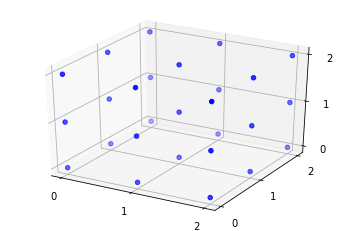

In [ ]:
ax = plt.axes(projection='3d')
X = []
for item in points:
  X.append(item[0])
Y = []
for item in points:
  Y.append(item[1])
Z = []
for item in points:
  Z.append(item[2])

ax.scatter3D(X, Y, Z,c = 'blue')
ax.set_zticks([0, 1,2]);
ax.set_xticks([0, 1,2]);
ax.set_yticks([0, 1,2]);

In [ ]:
corner = [(0,0,0),(0,0,2),(0,2,0),(2,0,0),(2,2,2),(2,2,0),(2,0,2),(0,2,2)]

inside = [(1,1,1)]

outside_center = [(1,0,1),(0,1,1),(1,2,1),(2,1,1),(1,1,0),(1,1,2)]

outside_border = []
for element in points:
  if element not in corner:
    if element not in inside:
      if element not in outside_center:
        outside_border.append(element)

In [ ]:
p = []
for element in points:
  for el in points:
    p.append((element, el))

In [ ]:
prob = []

for element in p:
  if element[0] in inside:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/6
    else:
      probability = 0 
  if element[0] in corner:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/3
    else: 
      probability = 0
  if element[0] in outside_border:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/4
    else: 
      probability = 0 
  if element[0] in outside_center:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/5
    else: 
      probability = 0 
  prob.append(probability)
P = np.array(prob).reshape((27,27))

In [ ]:
#Create dictionary which will help go from transition probabilities to matrix elements 
dictionary = dict({})
i=1
for item in points:
  dictionary[i] = item
  i = i+1

A = np.linalg.matrix_power(P,n)
keys = []
for key, value in dictionary.items():
    if(value == lookup_value):
         keys.append(key)
         number = np.array(keys)
probabilities = A[number-1,:]

Text(0.5, 0.92, 'Probability of being at any particular point after n steps giving intial point \n\n Blue circle indicates initial point; Red dots indicate where it can end up with positive probability')

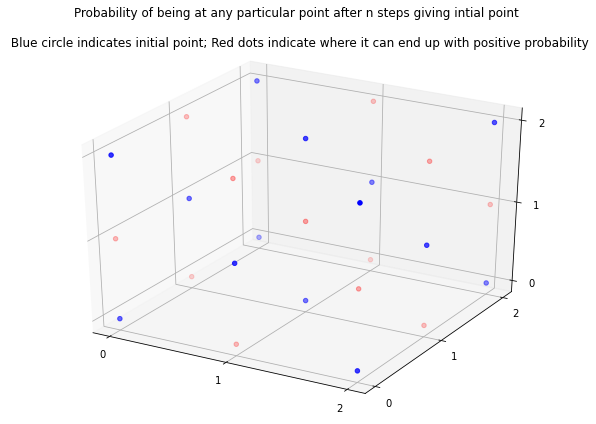

In [ ]:
# Probability of being at any particular point after n steps giving intial point 
#circle = plt.Circle(lookup_value, 0.2, color='blue', alpha = 0.5, fill=False)

"""x_ = np.tile(X,10)
y_ = np.repeat(Y,10)
"""

# Defining matrix for colors 
c = np.zeros((27,4))
for i in range(27):
  if (round(probabilities[0][i],3) == 0):
    c[i,0] = 0 #red
    c[i,1] = 0 #green
    c[i,2] = 1 #blue
    c[i,3] = 1 #alpha
  if (round(probabilities[0][i],3) > 0):
    c[i,0] = 1
    c[i,1] = 0 
    c[i,2] = 0

    if (probabilities[0][i] > 0) and (max(probabilities[0]) < 0.05):
      c[i,3] = probabilities[0][i]*50
    if (probabilities[0][i] > 0) and (max(probabilities[0]) < 0.1):
      c[i,3] = probabilities[0][i]*10
    if (probabilities[0][i] > 0) and (max(probabilities[0]) < 0.2):
      c[i,3] = probabilities[0][i]*5
    if (probabilities[0][i] > 0) and (max(probabilities[0]) >= 0.2):
      c[i,3] = probabilities[0][i]



fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z,c = c)
ax.set_zticks([0, 1,2]);
ax.set_xticks([0, 1,2]);
ax.set_yticks([0, 1,2]);


#for i in range(len(probabilities[0])):
"""

ax.add_patch(circle)
ax.set_aspect('equal', adjustable='datalim')

for i, txt in enumerate(probabilities[0]):
  if round(txt,3) >0:
    if i > 89:
      ax.annotate(round(txt,2), xy = (x_[i], y_[i]),  xytext=(x_[i],y_[i]-.3))
    else: 
      ax.annotate(round(txt,2), xy = (x_[i], y_[i]),  xytext=(x_[i],y_[i]+.15))"""


plt.title("Probability of being at any particular point after n steps giving intial point \
\n\n Blue circle indicates initial point; Red dots indicate where it can end up with positive probability", pad = 20)

# 3D - plotly

In [ ]:
# Create all permutations of 0,1,2 for 3D space 
from itertools import permutations
import numpy as np
import pandas as pd
import math 
import scipy.linalg as la
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations_with_replacement
from matplotlib.pyplot import figure, show

In [ ]:
n = 10 # number of steps
lookup_value = (1,1,1)

combinations = []
p = []
comb = combinations_with_replacement([0,1,2],3)
for item in comb:
  combinations.append(item)
for item in combinations:
  point = permutations(item)
  for item in point:
    p.append(item)

points = []
for item in p:
  if item not in points:
    points.append(item)

In [ ]:
X = []
for item in points:
  X.append(item[0])
X = np.array(X)
Y = []
for item in points:
  Y.append(item[1])
Y = np.array(Y)
Z = []
for item in points:
  Z.append(item[2])
Z = np.array(Z)

array([0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 2])

In [ ]:
# Specifying location of points 
corner = [(0,0,0),(0,0,2),(0,2,0),(2,0,0),(2,2,2),(2,2,0),(2,0,2),(0,2,2)]
inside = [(1,1,1)]
outside_center = [(1,0,1),(0,1,1),(1,2,1),(2,1,1),(1,1,0),(1,1,2)]
outside_border = []
for element in points:
  if element not in corner:
    if element not in inside:
      if element not in outside_center:
        outside_border.append(element)

In [ ]:
# p is all possible transitions from one point to another point - 729 transitions
p = []
for element in points:
  for el in points:
    p.append((element, el))

In [ ]:
# Transition matrix
prob = []

for element in p:
  if element[0] in inside:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/6
    else:
      probability = 0 
  if element[0] in corner:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/3
    else: 
      probability = 0
  if element[0] in outside_border:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/4
    else: 
      probability = 0 
  if element[0] in outside_center:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/5
    else: 
      probability = 0 
  prob.append(probability)
P = np.array(prob).reshape((27,27))

In [ ]:
# Probability array, given initial point (1 by 27 array) 
dictionary = dict({})
i=1
for item in points:
  dictionary[i] = item
  i = i+1

A = np.linalg.matrix_power(P,n)
keys = []
for key, value in dictionary.items():
    if(value == lookup_value):
         keys.append(key)
         number = np.array(keys)
probabilities = A[number-1,:]

In [ ]:
#Putting data in correct format for pltly

df = pd.DataFrame({'X': X, 'Y': Y, 'Z':Z, 'Prob': probabilities[0]})
df['Probabilities'] = df.apply(lambda row: round(row.Prob,3), axis=1)
df.drop('Prob', inplace=True, axis=1)

def annotation(row):
  if (row['Probabilities'] > 0):
    return row['Probabilities']

df['Annotation'] = df.apply(lambda row: annotation(row), axis = 1)

def categorise(row):  
    if (row['Probabilities'] == 0):
        return 'blue'
    elif (row['Probabilities'] > 0):
        return 'red'

df['Colour'] = df.apply(lambda row: categorise(row), axis=1)
maximum = df['Probabilities'].max()

def size(row): # take min and max and rescale 
  return (20*row['Probabilities'])/maximum # we have defined 20 as the maximum size 

df['Size'] = df.apply(lambda row: size(row), axis=1)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x='X', y='Y', z='Z',
              color='Colour', size='Size', text = 'Annotation',
              opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

array([0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 2])

# 3D plotly - 5 by 5

In [ ]:
# Create all permutations of 0,1,2 for 3D space 
from itertools import permutations
import numpy as np
import pandas as pd
import math 
import scipy.linalg as la
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations_with_replacement
from matplotlib.pyplot import figure, show

n = input("Enter the number of steps: "); # specify the number of steps
n = int(n)

lookup_value = input("Please enter coordinate in the form 3,4,3 for (3,4,3)");
lookup_value = tuple(map(int, lookup_value.split(',')))

combinations = []
p = []
comb = combinations_with_replacement([0,1,2,3,4],3)
for item in comb:
  combinations.append(item)
for item in combinations:
  point = permutations(item)
  for item in point:
    p.append(item)

points = []
for item in p:
  if item not in points:
    points.append(item)

X = []
for item in points:
  X.append(item[0])
X = np.array(X)
Y = []
for item in points:
  Y.append(item[1])
Y = np.array(Y)
Z = []
for item in points:
  Z.append(item[2])
Z = np.array(Z)

# Specifying location of points 
corner = []
corner = [(0,0,0),(0,0,4),(0,4,0),(4,0,0),(4,4,4),(4,4,0),(4,0,4),(0,4,4)] # done 

inside = []
for item in points:
  if (item[0] != 0) and (item[0] != 4) and (item[1] != 0) and (item[1] != 4) and (item[2] != 0) and (item[2] != 4):
    inside.append(item) # done 

outside_border = []
for item in points:
  if item not in corner:
    if item not in inside:
      count = 0
      for i in range(3):
        if (item[i] == 0) or (item[i] == 4):
          count = count+1
      if (count == 2):
        outside_border.append(item)

outside_centre = []
for item in points:
  if item not in corner:
    if item not in inside:
      if item not in outside_border:
        outside_centre.append(item)

# p is all possible transitions from one point to another point - 15,625 transitions
p = []
for element in points:
  for el in points:
    p.append((element, el))


# Transition matrix
prob = []

for element in p:
  if element[0] in inside:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/6
    else:
      probability = 0 
  if element[0] in corner:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/3
    else: 
      probability = 0
  if element[0] in outside_border:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/4
    else: 
      probability = 0 
  if element[0] in outside_centre:
    if (round(np.linalg.norm(np.array(element[0]) - np.array(element[1])),3) == 1):
      probability = 1/5
    else: 
      probability = 0 
  prob.append(probability)
P = np.array(prob).reshape((125,125))

# Probability array, given initial point (1 by 27 array) 
dictionary = dict({})
i=1
for item in points:
  dictionary[i] = item
  i = i+1

A = np.linalg.matrix_power(P,n)
keys = []
for key, value in dictionary.items():
    if(value == lookup_value):
         keys.append(key)
         number = np.array(keys)
probabilities = A[number-1,:]

#Putting data in correct format for pltly

df = pd.DataFrame({'X': X, 'Y': Y, 'Z':Z, 'Prob': probabilities[0]})
df['Probabilities'] = df.apply(lambda row: round(row.Prob,3), axis=1)
df.drop('Prob', inplace=True, axis=1)

def annotation(row):
  if (row['Probabilities'] > 0):
    return row['Probabilities']

df['Annotation'] = df.apply(lambda row: annotation(row), axis = 1)

def categorise(row):  
    if (row['Probabilities'] == 0):
        return 'blue'
    elif (row['Probabilities'] > 0):
        return 'red'

df['Colour'] = df.apply(lambda row: categorise(row), axis=1)
maximum = df['Probabilities'].max()

def size(row): # take min and max and rescale 
  return (20*row['Probabilities'])/maximum # we have defined 20 as the maximum size 

df['Size'] = df.apply(lambda row: size(row), axis=1)
df.at[int(np.array(keys))-1, 'Colour'] = 'green'
df.at[int(np.array(keys))-1, 'Size'] = 15

import plotly.express as px
fig = px.scatter_3d(df, x='X', y='Y', z='Z',
              color='Colour', size='Size', text = 'Annotation',
              opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40),title_text='Movement of molecules')

Enter the number of steps: 3
Please enter coordinate in the form 3,4,3 for (3,4,3)1,2,3
